# Calculating Betas Using Pandas DataFrames

## 1. Import Libraries and Dependencies

In [1]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

## 2. Create a Path to the File Using Pathlib.

In [2]:
# Set the file paths for the CSVs using the Path class from the pathlib library
msft_csv_path = Path("./Resources/MSFT.csv")
sp500_csv_path = Path("./Resources/SP500.csv")

## 3. Read the CSV into a Pandas DataFrame.

In [3]:
# Read the daily closing prices of MSFT, set the `date` as a datetime index
msft_df = pd.read_csv(msft_csv_path, index_col='date', infer_datetime_format=True, parse_dates=True)
sp500_df = pd.read_csv(sp500_csv_path, index_col='date', infer_datetime_format=True, parse_dates=True)

## 4. Combine DataFrames and Sort the Index

In [4]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
combined_df = pd.concat([msft_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(ascending=True, inplace=True)

# Display a few rows
combined_df.head()

,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.68,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.80,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.29,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.37,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.26,40.26,39.8100,1911.910034


## 5. Drop Extraneous Columns

In [5]:
# Drop extra columns and only leave the close columns and associated values
combined_df.drop(columns=['volume', 'open', 'high', 'low'], inplace=True)
combined_df.head()

,close,close
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 6. Rename Columns

In [6]:
# Rename the columns to match the corresponding stock
combined_df.columns = ["MSFT", "SP500"]
combined_df.head()

,MSFT,SP500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 7. Calculate Daily Returns

In [9]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

,MSFT,SP500
date,,
2014-05-20,NaN,NaN
2014-05-21,0.016885,0.008116
2014-05-22,-0.006196,0.002362
2014-05-23,0.000499,0.004248
2014-05-27,0.001745,0.005988


## 8. Calculate Covariance of MSFT returns vs. AAPL returns

In [10]:
# Calculate covariance of all daily returns of MSFT vs. AAPL
covariance = daily_returns['MSFT'].cov(daily_returns['SP500'])
covariance

9.084836971066262e-05

## 9. Calculate Variance of MSFT Returns

In [12]:
# Calculate variance of all daily returns of MSFT vs. AAPL
variance = daily_returns['MSFT'].var()
variance

0.00021456328327532686

## 10. Calculate Beta of MSFT

In [13]:
# Calculate beta of all daily returns of MSFT
msft_beta = covariance / variance
msft_beta

0.4234106055978194

## 11. Calculate 30-Day Rolling Covariance of MSFT Returns vs. S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of MSFT Returns vs.S&P 500 Returns'}, xlabel='date'>

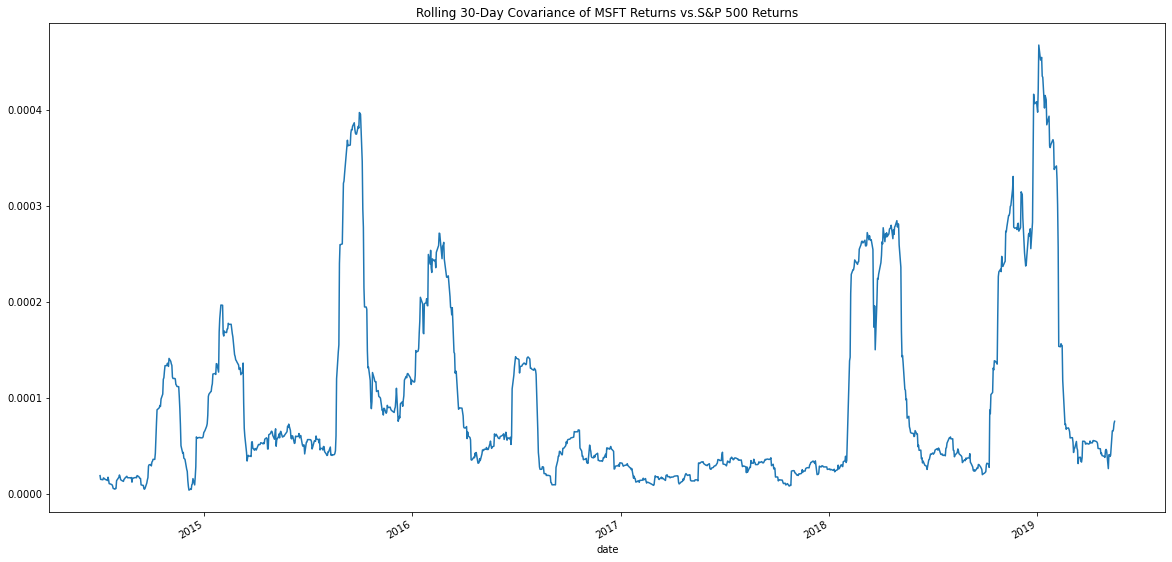

In [15]:
# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
rolling_covariance = daily_returns['MSFT'].rolling(window=30).cov(daily_returns['SP500'])
rolling_covariance.plot(figsize=(20, 10), title="Rolling 30-Day Covariance of MSFT Returns vs.S&P 500 Returns")

## 12. Calculate 30-Day Rolling Variance of S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 30-Day Variance of S&P 500 Returns'}, xlabel='date'>

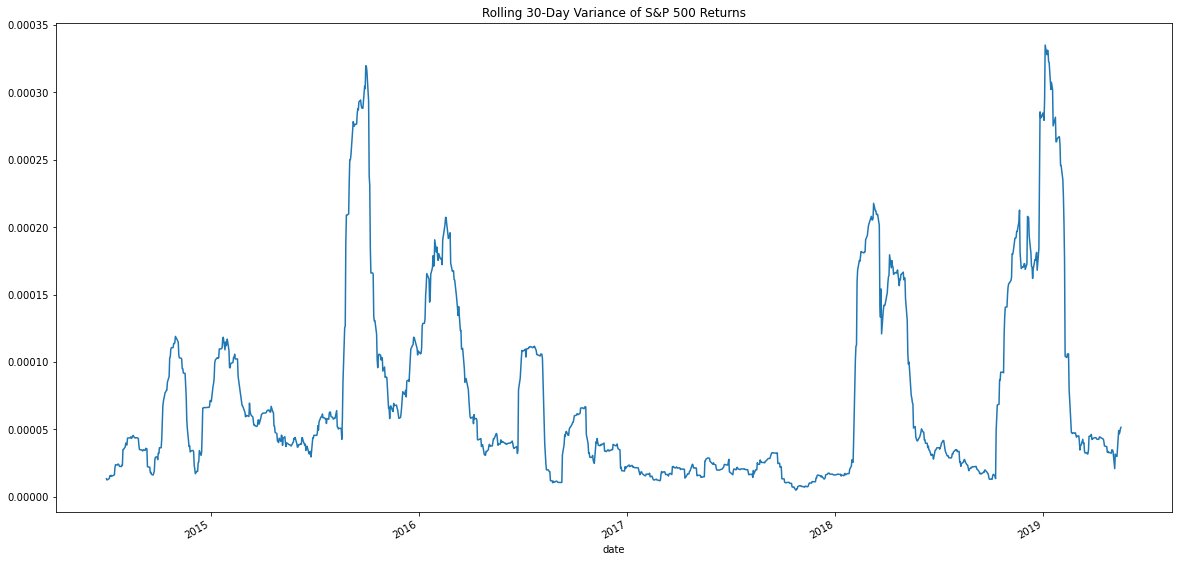

In [18]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
rolling_variance = daily_returns['SP500'].rolling(window=30).var()
rolling_variance.plot(figsize=(20, 10), title="Rolling 30-Day Variance of S&P 500 Returns")

## 13. Calculate 30-Day Rolling Beta of MSFT

<AxesSubplot:title={'center':'Rolling 30-Day Beta of MSFT'}, xlabel='date'>

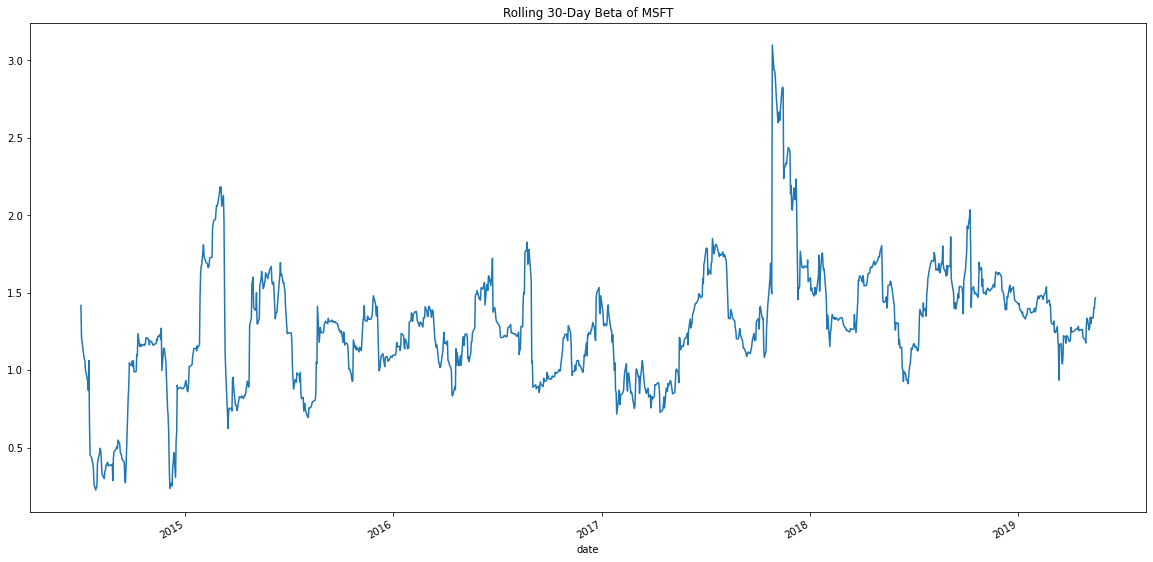

In [19]:
# Calculate 30-day rolling beta of MSFT and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title="Rolling 30-Day Beta of MSFT")

## 14. Beta vs. Correlation

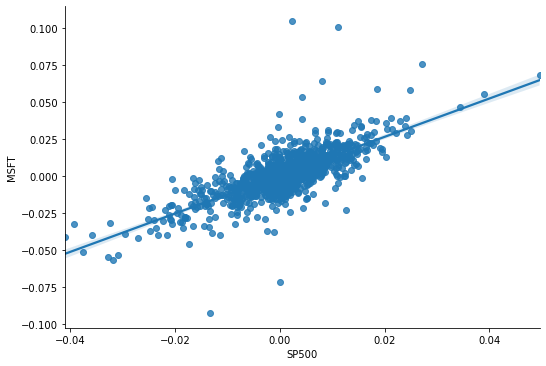

In [20]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='SP500', y='MSFT', data=daily_returns, aspect=1.5, fit_reg=True)